In [1]:
import os
os.environ['TF_ENABLE_TENSORRT_OPS'] = '0'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("data without infertility _final.csv")
df.head(5)#for accessing the first 5 datas

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
0,1.0,10001.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,10002.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,10003.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,10004.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,10005.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


In [4]:
df.shape #shape of the data

(541, 43)

In [5]:
df = df.drop(['Sl. No'], axis=1)
df = df.drop(['Patient File No.'], axis=1)
# Dropping those column which will not be necessary in case of prediction

In [6]:
df.isna().sum()

PCOS (Y/N)                 1
 Age (yrs)                 1
Weight (Kg)                1
Height(Cm)                 1
BMI                        1
Blood Group                1
Pulse rate(bpm)            1
RR (breaths/min)           1
Hb(g/dl)                   1
Cycle(R/I)                 1
Cycle length(days)         1
Marraige Status (Yrs)      2
Pregnant(Y/N)              1
No. of aborptions          1
FSH(mIU/mL)                1
LH(mIU/mL)                 1
FSH/LH                     1
Hip(inch)                  1
Waist(inch)                1
Waist:Hip Ratio            1
TSH (mIU/L)                1
AMH(ng/mL)                 1
PRL(ng/mL)                 1
Vit D3 (ng/mL)             1
PRG(ng/mL)                 1
RBS(mg/dl)                 1
Weight gain(Y/N)           1
hair growth(Y/N)           1
Skin darkening (Y/N)       1
Hair loss(Y/N)             1
Pimples(Y/N)               1
Fast food (Y/N)            2
Reg.Exercise(Y/N)          1
BP _Systolic (mmHg)        1
BP _Diastolic 

In [7]:
df.drop(['Unnamed: 42'], axis=1, inplace=True)

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.isna().sum()

PCOS (Y/N)               0
 Age (yrs)               0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    0
Pregnant(Y/N)            0
No. of aborptions        0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          0
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg)      0
BP _Diastolic (mmHg)     0
Follicle No. (L)         0
Follicle No. (R)         0
A

In [10]:
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,10.48,2.0,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,11.70,2.0,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,11.80,2.0,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,12.00,2.0,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,10.00,2.0,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0


In [11]:
df.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', 'FSH(mIU/mL)', 'LH(mIU/mL)',
       'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

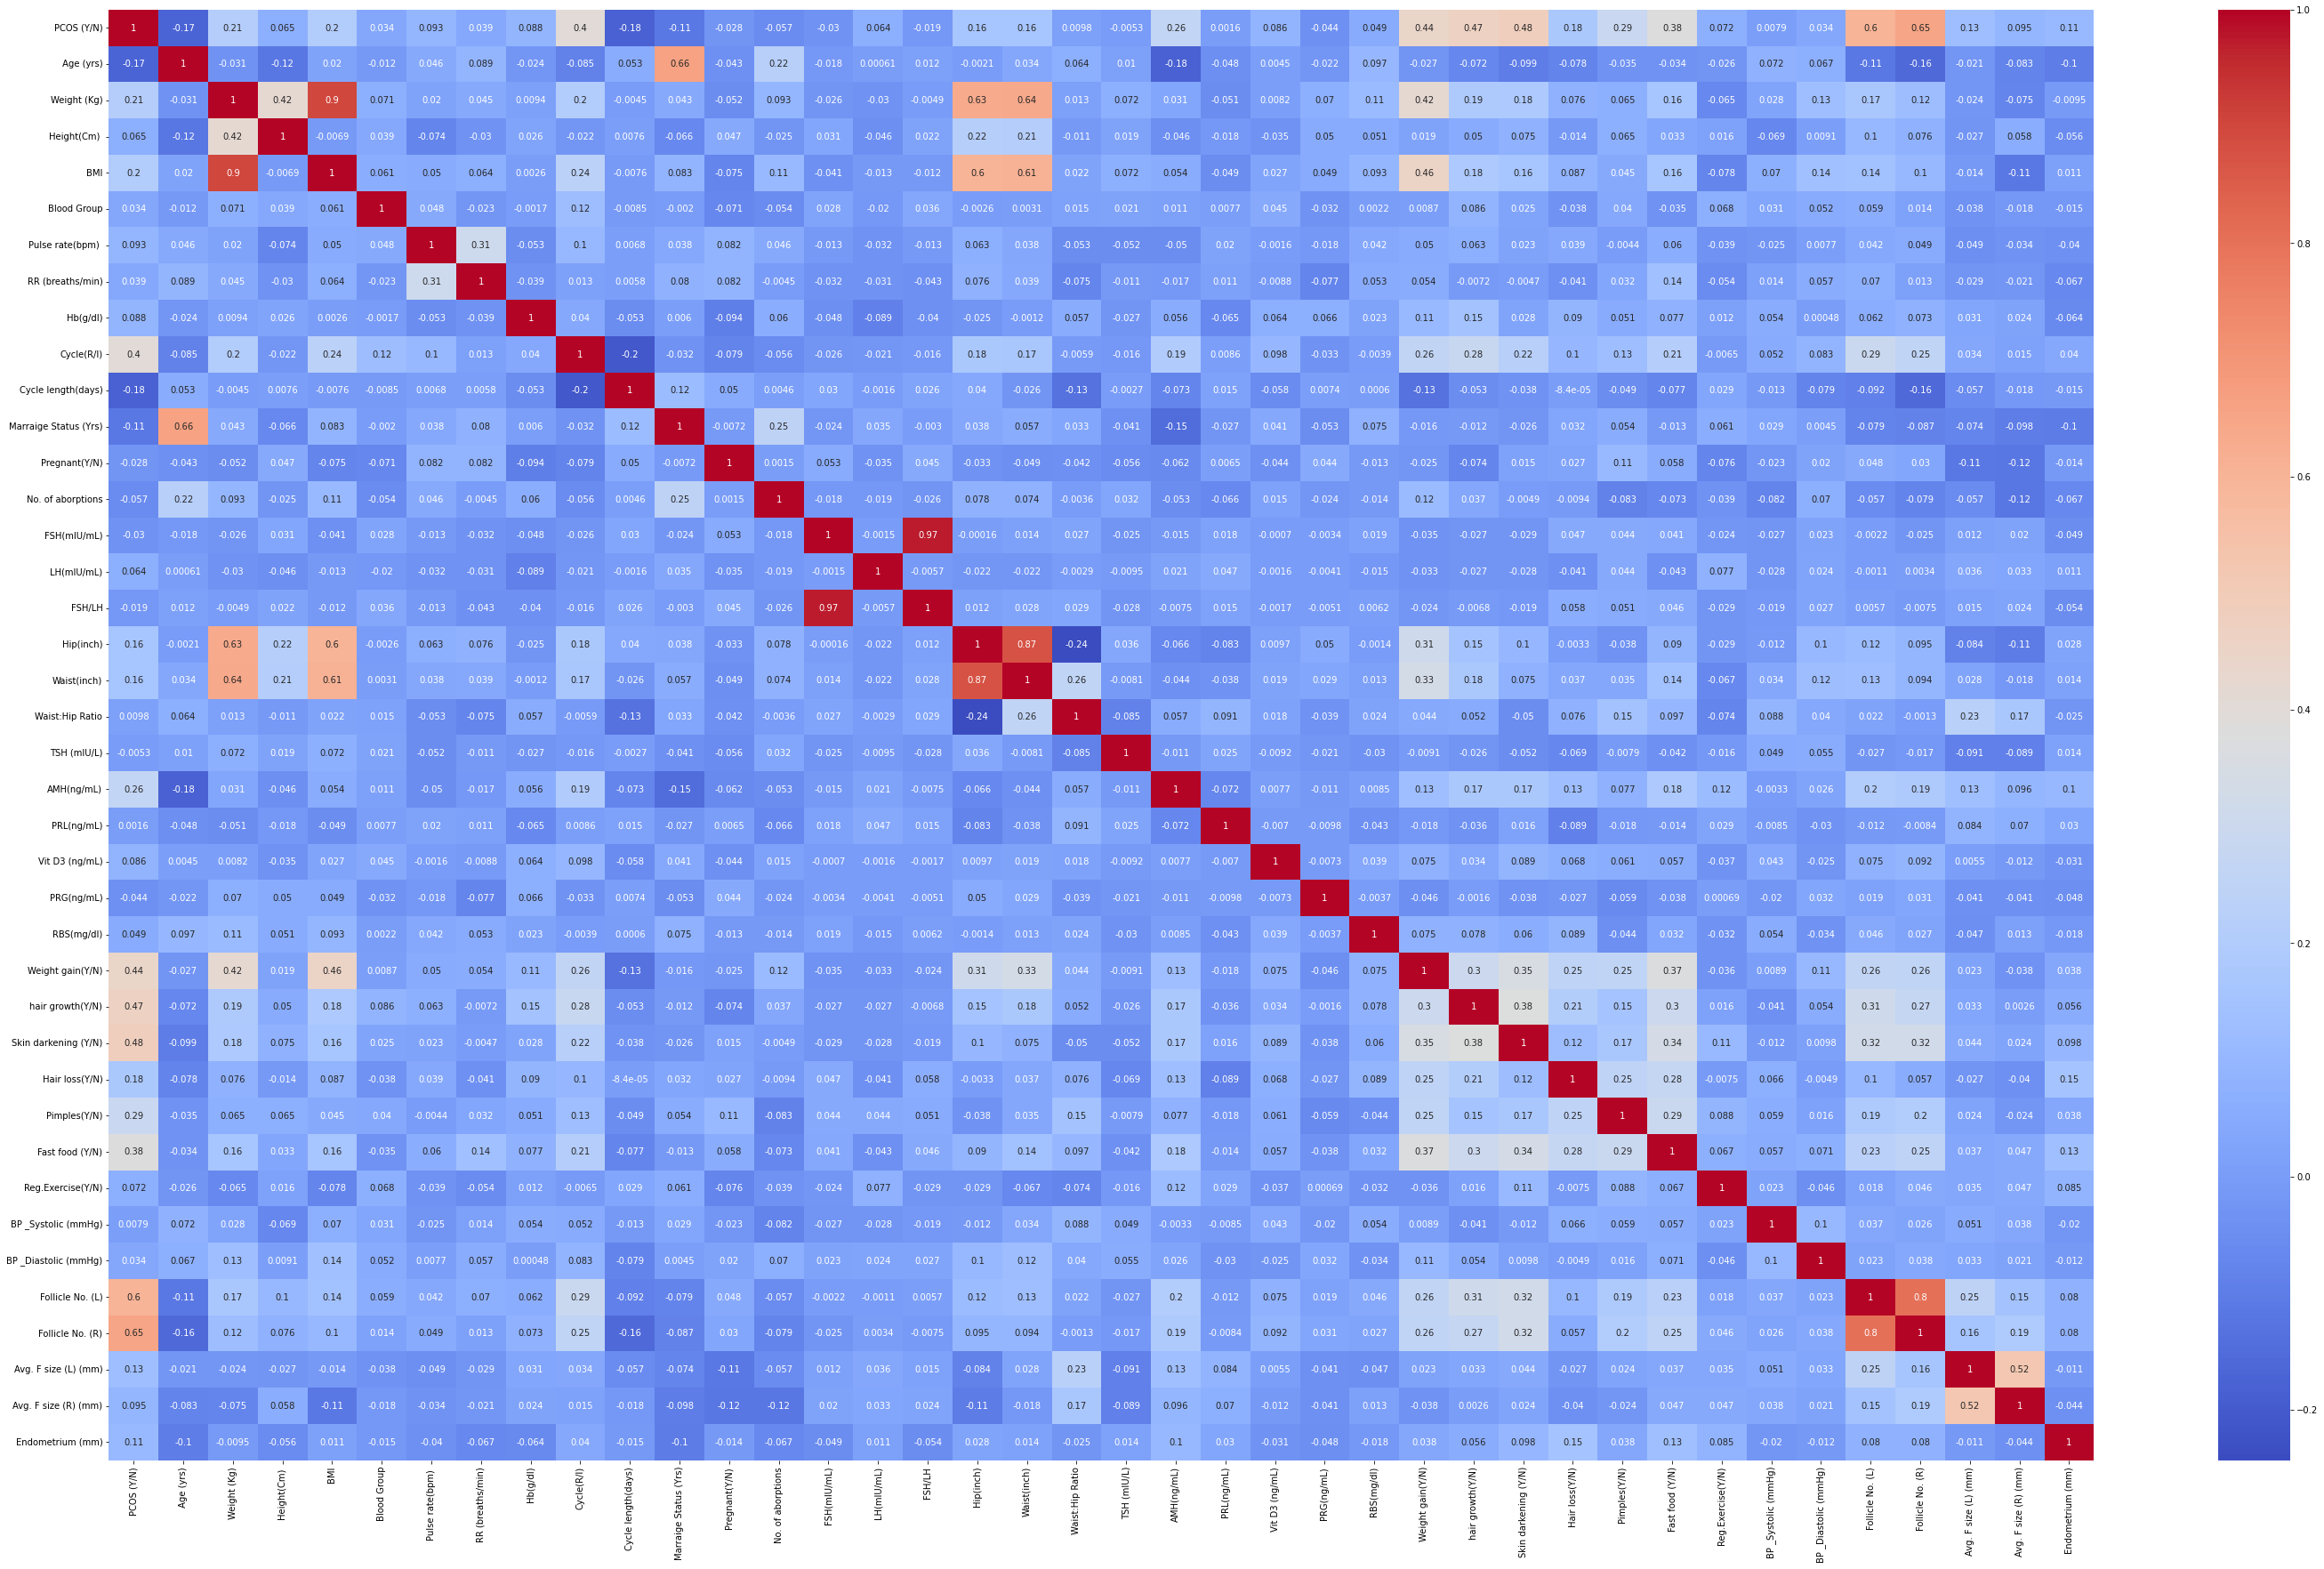

In [12]:
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [13]:
X = df.drop(['PCOS (Y/N)', 'Weight (Kg)', 'Height(Cm) ','FSH(mIU/mL)'],axis=1).values
#The code is dropping one of the columns of the dataset, 
# specifically the column whose name is specified in the string 'name of the target column'. 
# The .drop() method is used to drop a specified column or row from a DataFrame. 
# The axis=1 argument specifies that we want to drop a column (as opposed to a row) 
# and the .values at the end of the code is used to return the values of the DataFrame as a numpy array
y = df['PCOS (Y/N)'].values

# Basically in this code we are taking the target value from the dataset and putting it in a seperate array

In [14]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df)

# Transform the data
df = scaler.transform(df)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, shuffle=True)

In [16]:
X_train.shape

(430, 36)

In [17]:
y_train.shape

(430,)

In [18]:
X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('float32')

In [19]:
X_test = np.array(X_test).astype('float32')
y_test = np.array(y_test).astype('float32')

In [20]:
#Designing the model#

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

2023-03-07 00:56:19.462909: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 00:56:19.645912: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-07 00:56:19.650069: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 00:56:19.650091: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [22]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_dim = X_train.shape[1]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    #To prevent over fitting of the data in each layer for some of the neurons are dropped at random
    tf.keras.layers.Dense(1, activation= 'sigmoid') #Binary Activation function
])

2023-03-07 00:56:26.927882: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-07 00:56:26.927908: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sun): /proc/driver/nvidia/version does not exist
2023-03-07 00:56:26.928385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
model1.compile(optimizer='adam',
                loss='binary_crossentropy', 
                metrics=['accuracy', 'binary_crossentropy'])

In [48]:
history = model1.fit(
    X_train, y_train, batch_size = 16, 
    epochs=500, validation_split = 0.2,
)

Epoch 1/500
22/22 [==============================] - 0s 5ms/step - loss: 1.9203e-04 - accuracy: 1.0000 - binary_crossentropy: 1.9203e-04 - val_loss: 15.0548 - val_accuracy: 0.8488 - val_binary_crossentropy: 15.0548
Epoch 2/500
22/22 [==============================] - 0s 6ms/step - loss: 1.4473e-04 - accuracy: 1.0000 - binary_crossentropy: 1.4473e-04 - val_loss: 15.0567 - val_accuracy: 0.8488 - val_binary_crossentropy: 15.0567
Epoch 3/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9971 - binary_crossentropy: 0.0080 - val_loss: 11.9082 - val_accuracy: 0.8140 - val_binary_crossentropy: 11.9082
Epoch 4/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1120 - accuracy: 0.9680 - binary_crossentropy: 0.1120 - val_loss: 19.8001 - val_accuracy: 0.8140 - val_binary_crossentropy: 19.8001
Epoch 5/500
22/22 [==============================] - 0s 6ms/step - loss: 0.0616 - accuracy: 0.9826 - binary_crossentropy: 0.0616 - val_loss: 16.0985 - val_a

Epoch 40/500
22/22 [==============================] - 0s 4ms/step - loss: 3.0060e-04 - accuracy: 1.0000 - binary_crossentropy: 3.0060e-04 - val_loss: 11.8962 - val_accuracy: 0.8605 - val_binary_crossentropy: 11.8962
Epoch 41/500
22/22 [==============================] - 0s 3ms/step - loss: 2.3341e-04 - accuracy: 1.0000 - binary_crossentropy: 2.3341e-04 - val_loss: 11.8493 - val_accuracy: 0.8488 - val_binary_crossentropy: 11.8493
Epoch 42/500
22/22 [==============================] - 0s 4ms/step - loss: 4.1634e-04 - accuracy: 1.0000 - binary_crossentropy: 4.1634e-04 - val_loss: 11.8822 - val_accuracy: 0.8372 - val_binary_crossentropy: 11.8822
Epoch 43/500
22/22 [==============================] - 0s 5ms/step - loss: 1.5680e-04 - accuracy: 1.0000 - binary_crossentropy: 1.5680e-04 - val_loss: 11.8908 - val_accuracy: 0.8372 - val_binary_crossentropy: 11.8908
Epoch 44/500
22/22 [==============================] - 0s 5ms/step - loss: 2.0673e-04 - accuracy: 1.0000 - binary_crossentropy: 2.0673e-0

Epoch 79/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000 - binary_crossentropy: 0.0012 - val_loss: 9.5135 - val_accuracy: 0.8372 - val_binary_crossentropy: 9.5135
Epoch 80/500
22/22 [==============================] - 0s 4ms/step - loss: 1.8275 - accuracy: 0.9738 - binary_crossentropy: 1.8275 - val_loss: 10.2383 - val_accuracy: 0.8140 - val_binary_crossentropy: 10.2383
Epoch 81/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0589 - accuracy: 0.9767 - binary_crossentropy: 0.0589 - val_loss: 11.0316 - val_accuracy: 0.8372 - val_binary_crossentropy: 11.0316
Epoch 82/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9826 - binary_crossentropy: 0.0765 - val_loss: 11.3959 - val_accuracy: 0.8023 - val_binary_crossentropy: 11.3959
Epoch 83/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9738 - binary_crossentropy: 0.0609 - val_loss: 11.8745 - val_accuracy: 0.86

22/22 [==============================] - 0s 3ms/step - loss: 7.1684e-04 - accuracy: 1.0000 - binary_crossentropy: 7.1684e-04 - val_loss: 14.9284 - val_accuracy: 0.8488 - val_binary_crossentropy: 14.9284
Epoch 118/500
22/22 [==============================] - 0s 3ms/step - loss: 4.1202e-04 - accuracy: 1.0000 - binary_crossentropy: 4.1202e-04 - val_loss: 15.1127 - val_accuracy: 0.8488 - val_binary_crossentropy: 15.1127
Epoch 119/500
22/22 [==============================] - 0s 4ms/step - loss: 4.6448e-04 - accuracy: 1.0000 - binary_crossentropy: 4.6448e-04 - val_loss: 14.9670 - val_accuracy: 0.8488 - val_binary_crossentropy: 14.9670
Epoch 120/500
22/22 [==============================] - 0s 4ms/step - loss: 3.7049e-04 - accuracy: 1.0000 - binary_crossentropy: 3.7049e-04 - val_loss: 14.8580 - val_accuracy: 0.8372 - val_binary_crossentropy: 14.8580
Epoch 121/500
22/22 [==============================] - 0s 4ms/step - loss: 1.3510e-04 - accuracy: 1.0000 - binary_crossentropy: 1.3510e-04 - val_l

Epoch 156/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9971 - binary_crossentropy: 0.0028 - val_loss: 5.2596 - val_accuracy: 0.8488 - val_binary_crossentropy: 5.2596
Epoch 157/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9971 - binary_crossentropy: 0.0073 - val_loss: 5.1359 - val_accuracy: 0.8721 - val_binary_crossentropy: 5.1359
Epoch 158/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0130 - accuracy: 0.9942 - binary_crossentropy: 0.0130 - val_loss: 5.1485 - val_accuracy: 0.8488 - val_binary_crossentropy: 5.1485
Epoch 159/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9913 - binary_crossentropy: 0.0133 - val_loss: 5.3556 - val_accuracy: 0.8605 - val_binary_crossentropy: 5.3556
Epoch 160/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9971 - binary_crossentropy: 0.0067 - val_loss: 5.2432 - val_accuracy: 0.8605

22/22 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000 - binary_crossentropy: 0.0023 - val_loss: 6.9110 - val_accuracy: 0.8256 - val_binary_crossentropy: 6.9110
Epoch 196/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.9826 - binary_crossentropy: 0.0408 - val_loss: 8.8124 - val_accuracy: 0.8488 - val_binary_crossentropy: 8.8124
Epoch 197/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1434 - accuracy: 0.9564 - binary_crossentropy: 0.1434 - val_loss: 9.0364 - val_accuracy: 0.8488 - val_binary_crossentropy: 9.0364
Epoch 198/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0970 - accuracy: 0.9564 - binary_crossentropy: 0.0970 - val_loss: 8.7994 - val_accuracy: 0.8488 - val_binary_crossentropy: 8.7994
Epoch 199/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9913 - binary_crossentropy: 0.0158 - val_loss: 10.0171 - val_accuracy: 0.7907 - val_binary

Epoch 234/500
22/22 [==============================] - 0s 4ms/step - loss: 1.4044e-04 - accuracy: 1.0000 - binary_crossentropy: 1.4044e-04 - val_loss: 12.4038 - val_accuracy: 0.8256 - val_binary_crossentropy: 12.4038
Epoch 235/500
22/22 [==============================] - 0s 4ms/step - loss: 8.1774e-04 - accuracy: 1.0000 - binary_crossentropy: 8.1774e-04 - val_loss: 12.3994 - val_accuracy: 0.8372 - val_binary_crossentropy: 12.3994
Epoch 236/500
22/22 [==============================] - 0s 4ms/step - loss: 1.1829e-04 - accuracy: 1.0000 - binary_crossentropy: 1.1829e-04 - val_loss: 12.3884 - val_accuracy: 0.8372 - val_binary_crossentropy: 12.3884
Epoch 237/500
22/22 [==============================] - 0s 4ms/step - loss: 2.2275e-04 - accuracy: 1.0000 - binary_crossentropy: 2.2275e-04 - val_loss: 12.4876 - val_accuracy: 0.8372 - val_binary_crossentropy: 12.4876
Epoch 238/500
22/22 [==============================] - 0s 3ms/step - loss: 5.3212e-04 - accuracy: 1.0000 - binary_crossentropy: 5.32

22/22 [==============================] - 0s 6ms/step - loss: 5.5061e-04 - accuracy: 1.0000 - binary_crossentropy: 5.5061e-04 - val_loss: 16.5023 - val_accuracy: 0.8605 - val_binary_crossentropy: 16.5023
Epoch 273/500
22/22 [==============================] - 0s 5ms/step - loss: 6.6540e-04 - accuracy: 1.0000 - binary_crossentropy: 6.6540e-04 - val_loss: 16.2588 - val_accuracy: 0.8605 - val_binary_crossentropy: 16.2588
Epoch 274/500
22/22 [==============================] - 0s 4ms/step - loss: 3.9139e-04 - accuracy: 1.0000 - binary_crossentropy: 3.9139e-04 - val_loss: 16.2681 - val_accuracy: 0.8605 - val_binary_crossentropy: 16.2681
Epoch 275/500
22/22 [==============================] - 0s 3ms/step - loss: 8.9060e-04 - accuracy: 1.0000 - binary_crossentropy: 8.9060e-04 - val_loss: 16.3038 - val_accuracy: 0.8605 - val_binary_crossentropy: 16.3038
Epoch 276/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000 - binary_crossentropy: 0.0013 - val_loss: 16.

Epoch 311/500
22/22 [==============================] - 0s 5ms/step - loss: 5.1414e-04 - accuracy: 1.0000 - binary_crossentropy: 5.1414e-04 - val_loss: 16.2939 - val_accuracy: 0.8488 - val_binary_crossentropy: 16.2939
Epoch 312/500
22/22 [==============================] - 0s 3ms/step - loss: 8.7876e-04 - accuracy: 1.0000 - binary_crossentropy: 8.7876e-04 - val_loss: 16.2918 - val_accuracy: 0.8488 - val_binary_crossentropy: 16.2918
Epoch 313/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000 - binary_crossentropy: 0.0012 - val_loss: 16.3270 - val_accuracy: 0.8488 - val_binary_crossentropy: 16.3270
Epoch 314/500
22/22 [==============================] - 0s 3ms/step - loss: 5.3937e-04 - accuracy: 1.0000 - binary_crossentropy: 5.3937e-04 - val_loss: 16.4135 - val_accuracy: 0.8488 - val_binary_crossentropy: 16.4135
Epoch 315/500
22/22 [==============================] - 0s 3ms/step - loss: 1.9538e-04 - accuracy: 1.0000 - binary_crossentropy: 1.9538e-04 -

Epoch 350/500
22/22 [==============================] - 0s 4ms/step - loss: 5.3479e-04 - accuracy: 1.0000 - binary_crossentropy: 5.3479e-04 - val_loss: 8.3150 - val_accuracy: 0.8488 - val_binary_crossentropy: 8.3150
Epoch 351/500
22/22 [==============================] - 0s 3ms/step - loss: 8.5505e-04 - accuracy: 1.0000 - binary_crossentropy: 8.5505e-04 - val_loss: 8.2341 - val_accuracy: 0.8488 - val_binary_crossentropy: 8.2341
Epoch 352/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.9971 - binary_crossentropy: 0.0052 - val_loss: 7.7899 - val_accuracy: 0.8488 - val_binary_crossentropy: 7.7899
Epoch 353/500
22/22 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000 - binary_crossentropy: 0.0013 - val_loss: 8.8932 - val_accuracy: 0.8488 - val_binary_crossentropy: 8.8932
Epoch 354/500
22/22 [==============================] - 0s 6ms/step - loss: 2.8879e-04 - accuracy: 1.0000 - binary_crossentropy: 2.8879e-04 - val_loss: 9.384

22/22 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 1.0000 - binary_crossentropy: 0.0010 - val_loss: 8.6573 - val_accuracy: 0.8256 - val_binary_crossentropy: 8.6573
Epoch 389/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 0.9942 - binary_crossentropy: 0.0101 - val_loss: 8.2999 - val_accuracy: 0.8953 - val_binary_crossentropy: 8.2999
Epoch 390/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1278 - accuracy: 0.9593 - binary_crossentropy: 0.1278 - val_loss: 11.3390 - val_accuracy: 0.8023 - val_binary_crossentropy: 11.3390
Epoch 391/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0769 - accuracy: 0.9680 - binary_crossentropy: 0.0769 - val_loss: 8.6290 - val_accuracy: 0.8256 - val_binary_crossentropy: 8.6290
Epoch 392/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9942 - binary_crossentropy: 0.0279 - val_loss: 9.1816 - val_accuracy: 0.8256 - val_binar

Epoch 427/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - binary_crossentropy: 0.0018 - val_loss: 16.3534 - val_accuracy: 0.8605 - val_binary_crossentropy: 16.3534
Epoch 428/500
22/22 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - binary_crossentropy: 0.0011 - val_loss: 16.2221 - val_accuracy: 0.8488 - val_binary_crossentropy: 16.2221
Epoch 429/500
22/22 [==============================] - 0s 4ms/step - loss: 6.1218e-04 - accuracy: 1.0000 - binary_crossentropy: 6.1218e-04 - val_loss: 16.3329 - val_accuracy: 0.8372 - val_binary_crossentropy: 16.3329
Epoch 430/500
22/22 [==============================] - 0s 6ms/step - loss: 5.0121e-04 - accuracy: 1.0000 - binary_crossentropy: 5.0121e-04 - val_loss: 16.4158 - val_accuracy: 0.8372 - val_binary_crossentropy: 16.4158
Epoch 431/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - binary_crossentropy: 0.0017 - val_loss: 14.79

Epoch 466/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9942 - binary_crossentropy: 0.0153 - val_loss: 15.1148 - val_accuracy: 0.7791 - val_binary_crossentropy: 15.1148
Epoch 467/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1161 - accuracy: 0.9767 - binary_crossentropy: 0.1161 - val_loss: 24.4349 - val_accuracy: 0.7907 - val_binary_crossentropy: 24.4349
Epoch 468/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9942 - binary_crossentropy: 0.0164 - val_loss: 7.2091 - val_accuracy: 0.8372 - val_binary_crossentropy: 7.2091
Epoch 469/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9942 - binary_crossentropy: 0.0341 - val_loss: 6.6933 - val_accuracy: 0.8256 - val_binary_crossentropy: 6.6933
Epoch 470/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 1.0000 - binary_crossentropy: 0.0065 - val_loss: 12.9364 - val_accuracy: 0

In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'binary_crossentropy', 'val_loss', 'val_accuracy', 'val_binary_crossentropy'])

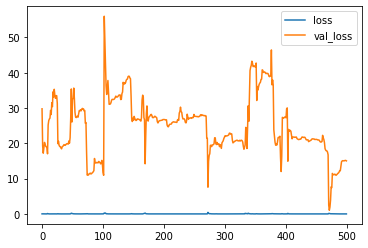

In [50]:
plt.plot(hiatory.history['loss'], label='loss')
plt.plot(hiatory.history['val_loss'], label='val_loss')
plt.legend()

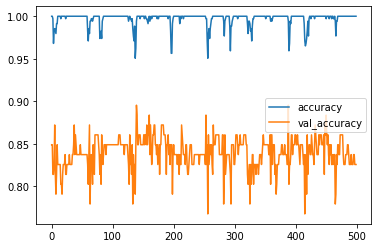

In [51]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [53]:
model1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 5.8371 - accuracy: 0.8796 - binary_crossentropy: 5.8371


[5.837109088897705, 0.8796296119689941, 5.837109088897705]

In [55]:
# Getting an accuracy of 87.96%

In [56]:
#Implementing KNN and k 17

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 

# define the model
knn = KNeighborsClassifier(n_neighbors=9)

# train the model
knn.fit(X_train, y_train)

# test the model
y_pred = knn.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8796296296296297


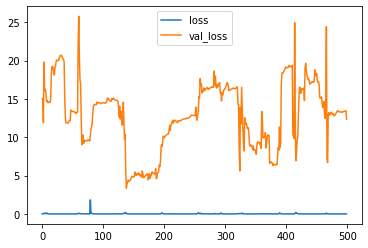

In [58]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

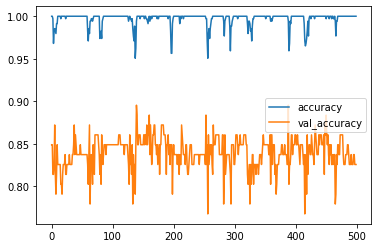

In [59]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [29]:
#Using decision tree and  max depth 15

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(criterion='entropy', max_depth=15)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Accuracy: 0.8425925925925926

Accuracy: 0.8425925925925926


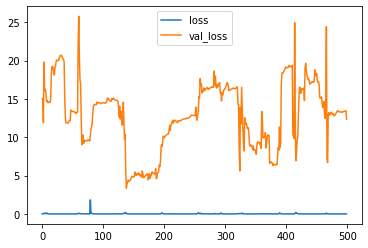

In [61]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

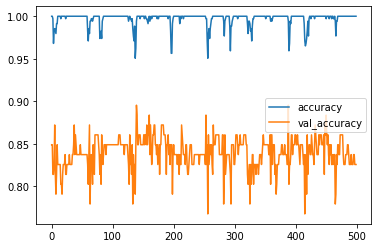

In [62]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [31]:
#Using Naive Bayes and GaussianNB class

In [63]:
# Import the necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Initialize the GaussianNB classifier
clf = GaussianNB()

# Train the model on the training data
clf.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


# Accuracy: 88.89%

Accuracy: 88.89%


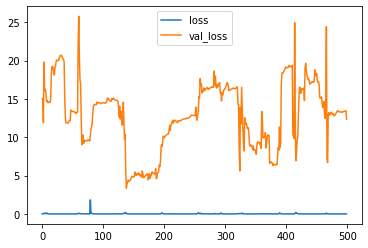

In [64]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

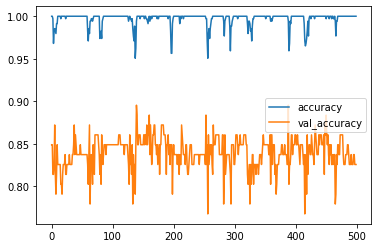

In [65]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()